# HackEDU Machine Learning and Data Science for Chemical Biology - Lecture 4 - Nov 19th, 2019


## Topics for Today: Dimensionality reduction and clustering

1. Math review: Eigenvalues, eigenvectors, singular value decomposition (4 minutes)
2. Dimensionality reduction (10 minutes)
3. What happens when we have clusters in 4+ dimensions? (10 minutes)
4. Time to catch up with topics we might not have had time for in previous lectures
5. 1 Hour Practical


## 1. Math review: Eigenvalues, eigenvectors, singular value decomposition, and principle component analysis

### Eigenvector/Eigenvalue condition:

For any $n\times n$ square matrix ${\bf A}$, if there exist a vector ${\bf u}$ and a scalar $\lambda$ such that the following eigen equation holds:

$Au=\lambda u$

note that:

$u$ = $n x 1$ eigenvector

$\lambda$ = eigenvalue (scalar)

$A$ = $n x n$ square matrix

### Decomposition
$(A-\lambda I)u=0$

**with idenity matrix $I$, to ensure the homogeneous equation system has a non-zero solution for $u$, the determinant of its coefficient matrix is 0**

$det(A-\lambda I)=0$

**called the characteristic polynomial equation of A**

In [1]:
import numpy as np
from numpy import linalg

print('idendity matrix\n', np.identity(3))

# vector
A = np.array([[1,2,3],[3,2,1],[1,0,-1]])
# eigen values and eigen vectors
eigval, eigvec = linalg.eig(A)
#print them
print(f'\nSliced Eigen values {eigval[0]}, {eigval[1]}, {np.round(eigval[2])}\n')
print(f'Sliced Eigen vectors {eigvec[:,0]}, {eigvec[:,1]}, {np.round(eigvec[:,2])}\n')

idendity matrix
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Sliced Eigen values 4.3166247903554, -2.3166247903554, 0.0

Sliced Eigen vectors [0.58428153 0.80407569 0.10989708], [ 0.73595785 -0.38198836 -0.55897311], [ 0. -1.  0.]



In [2]:
# prove that the condition holds for each case:
for i in range(3):
    u = eigvec[:,i]
    lam = eigval[i]
    print([np.round(n) for n in np.dot(A,u)-lam*u])

[0.0, -0.0, -0.0]
[0.0, 0.0, 0.0]
[-0.0, 0.0, 0.0]


### Relationship to principal component analysis (PCA)

Transformation of data into a set of **linearly uncorrelated variables** (Principal Components)

Transformed data is ordered by largest possible variance

Specific implementation of SVD

#### PCA process

1. normalize the data
2. find new axis (Principle Component 1, 2, 3, ...)
3. transform the data onto the new axis


##### also called: 

Karhunen-Loeve Transform

Hotelling Transform

Proper Orthogonal Decomposition

Eigenvalue Decomposition

Factor Analysis

Eckart-Young Theorem

Emprical Orthogonal Functions

etc.....

If you want more information about PCA, watch StatQuest:
https://www.youtube.com/watch?v=FgakZw6K1QQ



## 2. Dimensionality Reduction in General

Almost all applications of data science deal with large multidimensional data sets. Dimensionality reduction techniques allow:
1. Visualisation of high dimensional data
2. Acceleration of- and improvements to- unsupervised algorithms

### When to use it?
#### A) You want to reduce the number of variables without picking them explicitly
#### B) You don't care about the meaning of the individual variables
#### C) Ensure all variables are independent

In the next two examples, you will be looking at understanding and applying two of the most commonly successful dimenstionality reduction techniques, used widely in science and industry:
1. Principle Component Analysis (PCA)
2. t-distributed stochastic neighbor embedding (t-SNE)

Although these algorithms seem as though they "do the same thing", they are vastly different and are more suited to separate problems. 


#### Example in 3 dimensions

Say we have 1000 samples (i.e. cells) and we measure 3 variables for each sample, which we will call factor 1, factor 2, and factor 3. In this case the data separate themselves into 4 distinct clusters.

In [3]:
# imports
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pandas as pd
# setup parameters
clusters = 4                                            
dimensions = 3
num_points = 1000                                         

# initialize model data
centers = np.array([(0,0,0),(1,0,0),(0,1,0),(0,0,1)])*8
data = np.zeros((clusters*num_points, dimensions))       
labels = np.zeros(clusters*num_points, dtype = int)

print(labels.shape)

# generate model
for i in range(clusters):
    start = i*num_points
    end = start+num_points
    data[start:end, :] = np.random.randn(num_points, dimensions) + centers[i]
    labels[start:end] = i                                 

# put data into datafram
datadf = pd.DataFrame(data, columns = ('factor 1','factor 2','factor 3'))
datadf['label'] = labels                                    

# peak at the data
datadf.head()

(4000,)


,factor 1,factor 2,factor 3,label
0,-1.216895,-1.233908,0.842392,0
1,0.934543,-0.434409,0.502355,0
2,-0.518094,-0.343586,0.228290,0
3,-0.158620,-0.024178,-0.312773,0
4,-0.895743,0.263830,0.724215,0


In [4]:
# normalize the data
temp_X = datadf.iloc[:,0:-1].values 

features_X = StandardScaler().fit_transform(temp_X)
y = datadf['label'].values

### How do we visualise this?

Pair plots?

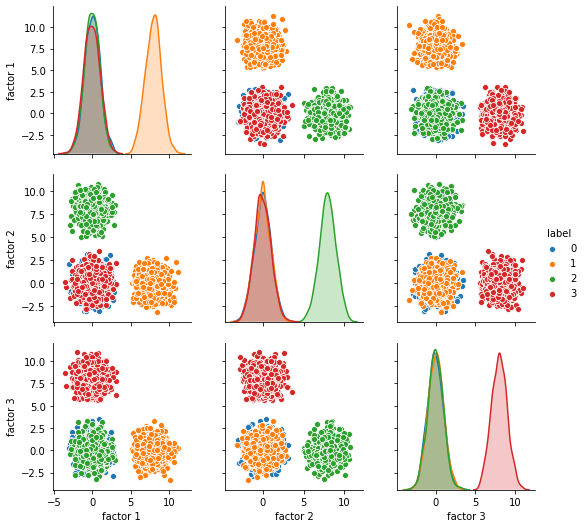

In [5]:
# Naively we can look at pair plots
import seaborn as sns
sns.pairplot(datadf, vars=('factor 1','factor 2','factor 3'),  hue="label")

### We need to be able to plot in 3D!

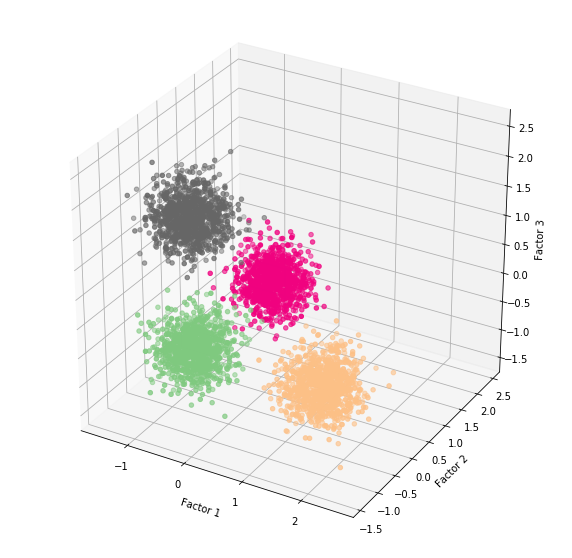

In [6]:
def plot3d(features, labels):
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for lab, col in zip(label_types, colors):
        ax.scatter(features[labels==lab, 0], features[labels==lab, 1], features[labels==lab, 2], c=[col])
    ax.set_xlabel('Factor 1')
    ax.set_ylabel('Factor 2')
    ax.set_zlabel('Factor 3')
        
    
        
plot3d(features_X,y)

# 3. What happens when we have clusters in 4+ dimensions?

### Part 1 Principle Component Analysis (PCA)

PCA is a dimensionality reduction algorithm based on Eigenvectors of the covariance matrix of your data. There exists $N$ principal components (PCs) for $N$ dimensions with each PC being a linear combination of the initial features (loading scores) and orthogonal to all other PCs. The result in the low dimensional space is determined by projecting the data on the $N$ components chosen, with the Prioritised PCs being those with the largest variation (largest Eigenvalue) so the data is separated as much as possible. A Scree plot will illustrate the variance captured in each PC.

PCA is broken down into:

- Generation of the covariance matrix

- Generation of eigenvalues and their associated vectors

- Calculation of variance for each eigenvalue solution (each PC), following this equation: 

$$ PC_i var = e_i\frac{100}{\sum e}$$

Where the eigenvalue (e) magnitude scales with the variance. $PC_i$ variance is the percentage variance of each component.


You are now going to manually perform a PCA on your features_X data, you are going to perform this manually and use the built in sklearn algorithm. You will then compare the results. As you have already noramlised the data, generate the covariance matrix and perform eigenvalue decomposition of it. Then, following the above equation determine the variance associated with each eigenvalue solution and plot a scree plot of this. You will need to look up the suitable numpy algorithms to perform both the covariance and the linear algebra required for eigen value determination.

[0.43746113 0.4365591  0.12597977]


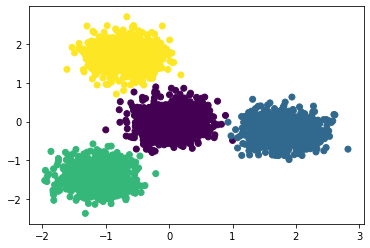

In [7]:
pca = PCA(n_components=3)
pca.fit(features_X)  
print(pca.explained_variance_ratio_)  
X_pca = pca.transform(features_X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)

### Part II t-distributed Stochastic Neighbour Embedding (t-SNE) and KMeans problem

[t-SNE](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) is another dimensionality reduction technique, but is vastly different to PCA. It is a [Manifold Learning](https://scikit-learn.org/stable/modules/manifold.html) algorithm for non-linear dimensionality reduction (NLDR).

In the High dimensional space, t-SNE treats datapoint affinites as joint probability distributions along a Gaussian. In the embedded space the probability distributions are along a Student’s t-distribution. The Kullback-Leibler (KL) divergance between the two spaces is minimised by gradient descent. This allows preservation of local structure whilst maximising separability in the embedded space.

The joint, conditional Gaussian probabilities for a pair of points in the high-dimensional space is defined as:

$$p_{j\mid i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)}$$

Thus the "similarity distribution" between each pair is:

$$p_{ij} = \frac{p_{j\mid i} + p_{i\mid j}}{2N}$$

The data is then randomly plotted and the similarity distributions in the embedded space is computed with t-distribution probabilities:

$$q_{ij} = \frac{(1 + \lVert \mathbf{y}_i - \mathbf{y}_j\rVert^2)^{-1}}{\sum_{k \neq l} (1 + \lVert \mathbf{y}_k - \mathbf{y}_l\rVert^2)^{-1}}$$

The KL divergence is then minimised by gradient descent:

$$KL(P||Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

In [8]:
# run Sklearn TSNE (This might take some time)
t_SNE = TSNE(n_components=2)
tsnex = t_SNE.fit_transform(features_X)

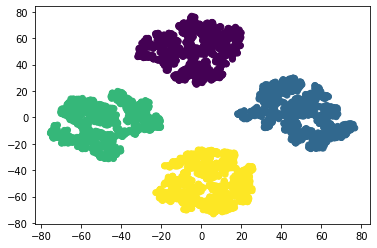

In [9]:
plt.scatter(tsnex[:,0],tsnex[:,1], c = labels)

### Part III Clustering with K Means

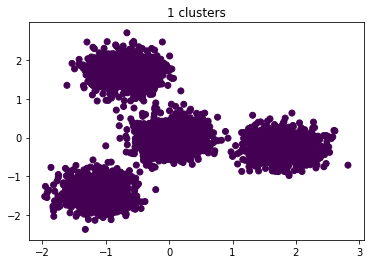

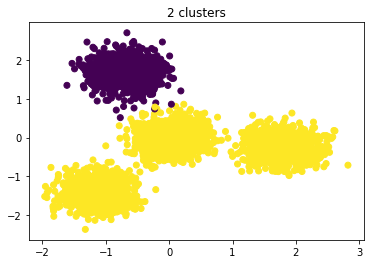

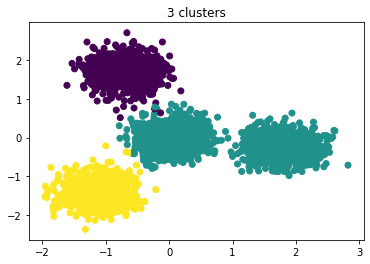

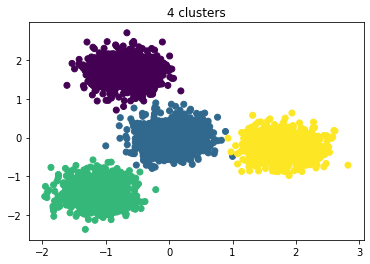

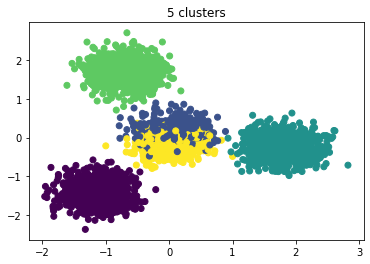

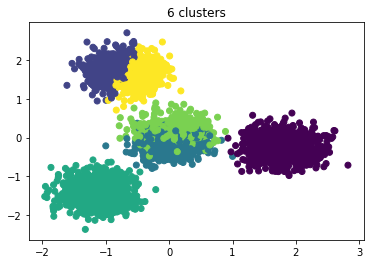

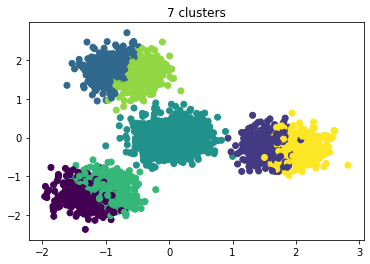

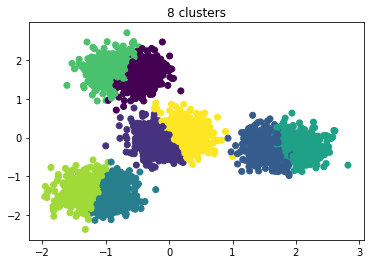

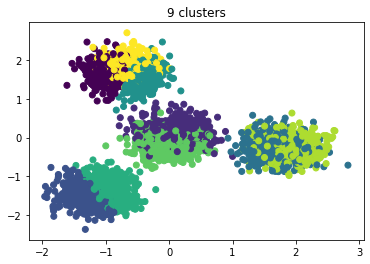

In [10]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
for i in range(1,10):
    km_model = KMeans(n_clusters=i, random_state=42)
    y_pred = km_model.fit_predict(X_pca)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
    plt.title(f"{i} clusters")
    plt.show()

    Sum_of_squared_distances.append(km_model.inertia_)

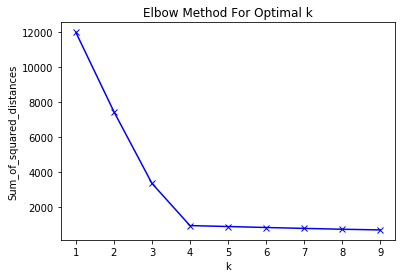

In [11]:
#Elbow Method
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

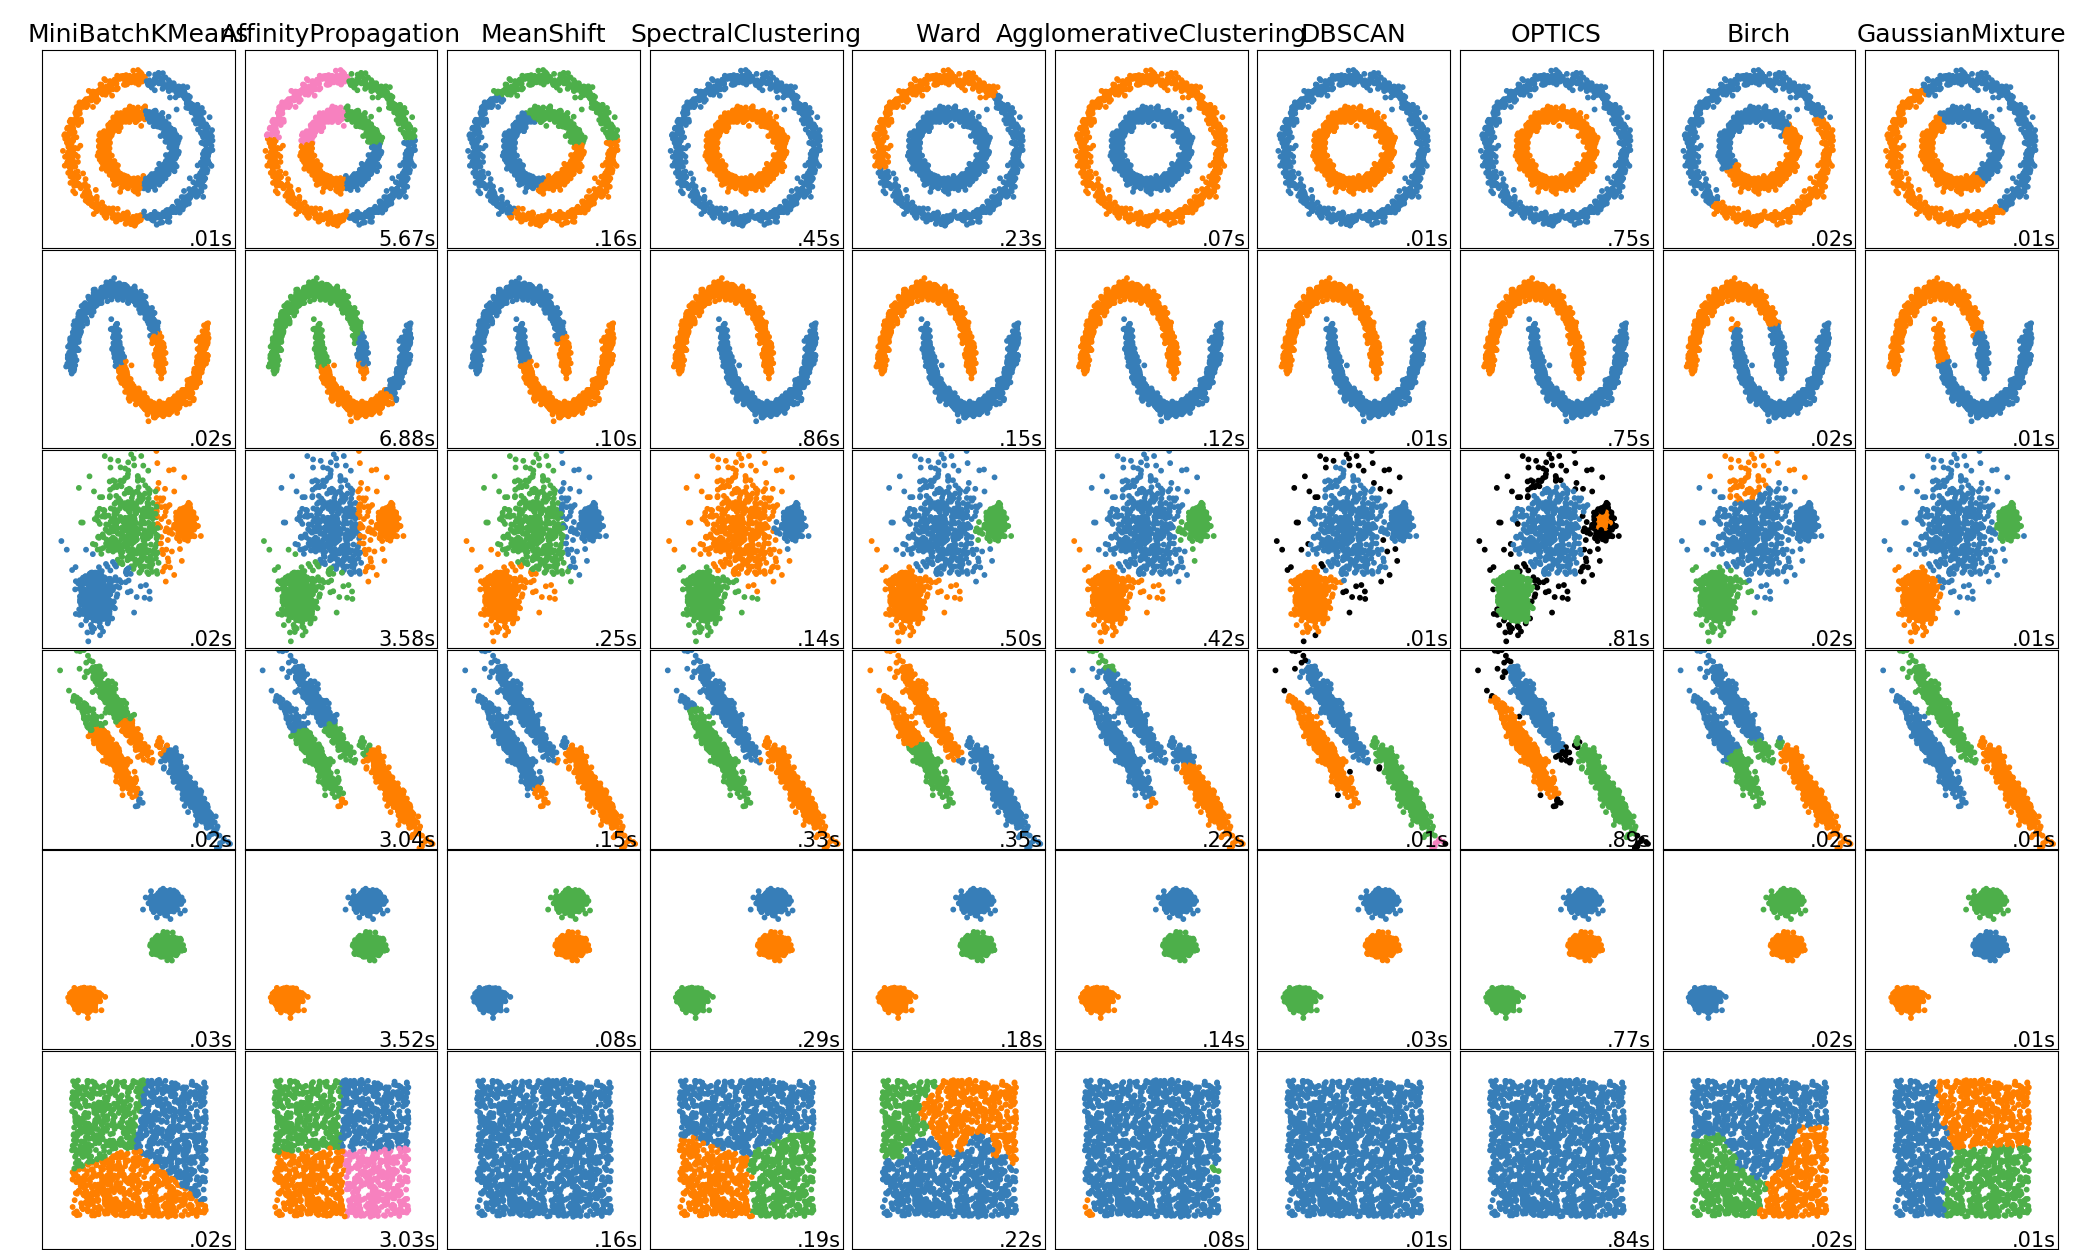

In [12]:
Image('clustering.png')

# 4. 1 Hour Lab Practical - When to use Non linear projections? Try your hand at some real data!

## Simple Problem

open the file 

'curious_X_data.npy'

have a look at the data and see if you can cluster it.

## CHEMBL Datasets

You have been provided with 1.8M compounds as provided by ChEMBL, Let's do some exploratory data analysis on this data set to see what useful information and correlations can be extracted.

or Download:

https://www.ebi.ac.uk/chembl/g/#browse/compounds

play around with the data and see which variables make sense to focus on and if you can cluster it. There is no correct answer here, but some are better than others.